Source: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

## Problem Statement

The primary objective of this project is to analyze and predict the default risk of credit card clients. Specifically, the task is to determine the factors that influence whether a client will default on their credit card payment in the next month and make a prediction for future clients with similar features. The target variable in this dataset is default payment next month, which indicates whether a customer has defaulted or not.

## Exploratory Data Analysis (EDA)

The notebook starts with loading the dataset and performing an initial inspection, including displaying the first few rows of data and identifying binary columns to check imbalances.
- Descriptive Statistics: Summary statistics are calculated to understand the distribution and central tendencies and spread of the features.
- Missing Values: None

Visualization:
- Target Variable Distribution: The distribution of the target variable (default payment next month) is visualized using a count plot to understand the balance of the classes.
- Correlation Matrix: A correlation matrix heatmap is plotted to identify relationships between features and the target variable.
- Scatter Plots: Scatter plots of bill amounts and payment amounts over time are created to visualize patterns and relationships between these features and the target variable.
- Box Plots: Box plots are used to visualize the distribution of credit limits by education level and marital status, segmented by default status. This helps in identifying potential      differences in default rates across different demographic groups.
- Outlier Analysis: Outlier treatment is applied to handle extreme values that could skew the analysis and model performance.

## Feature Engineering

- Handling Outliers: A function is defined to identify and remove outliers based on a specified threshold (mean ± 3 standard deviations). This step is crucial to ensure that the model is not adversely affected by extreme values. Dimensionality reduction approaches will also be evaluated to confimr if it will improve the overall performance of the model. 
- Standardization: The dataset consist of features that contain short ranges and long ranges that can potentially affect the performance of the model, we will attempt to confirm this difference by running models with model scaled features and non-scaled features as well. 
- Imbalance: The target class has a large imbalance. An approach to address this issue is to using SMOTE incase our model does not learn with new data during testing.


## Justification

- The process of understanding the data, visualizing key relationships, handling data quality issues such as outliers, and preparing the data for modeling are key components to buiding any predictive model. By exploring the dataset thoroughly and visualizing different aspects of the data, the analysis can uncover important patterns and relationships that will inform the modeling process. Handling outliers ensures that the model is robust as well as properly splitting and training the data, along with it's corresponding hyperparameter tuning, class imbalnce and standardization will be fundamental for the perfromance of our model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('default of credit card clients.csv', header=1, index_col=0)
pd.set_option('display.max_columns', None) 
df.head(10)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [2]:
for i in df.columns:
    if df[i].value_counts().shape[0] <= 2:
        print(f'"{i}" is a binary column.')

"SEX" is a binary column.
"default payment next month" is a binary column.


In [3]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
df.isnull().sum().sum()

0

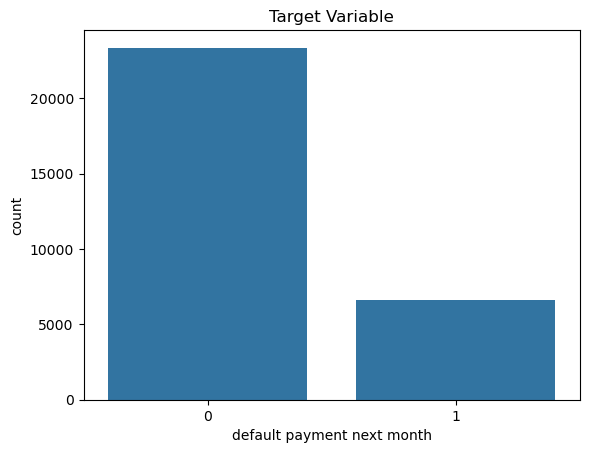

In [5]:
sns.countplot(data = df , x ='default payment next month')
plt.title('Target Variable')
plt.show();

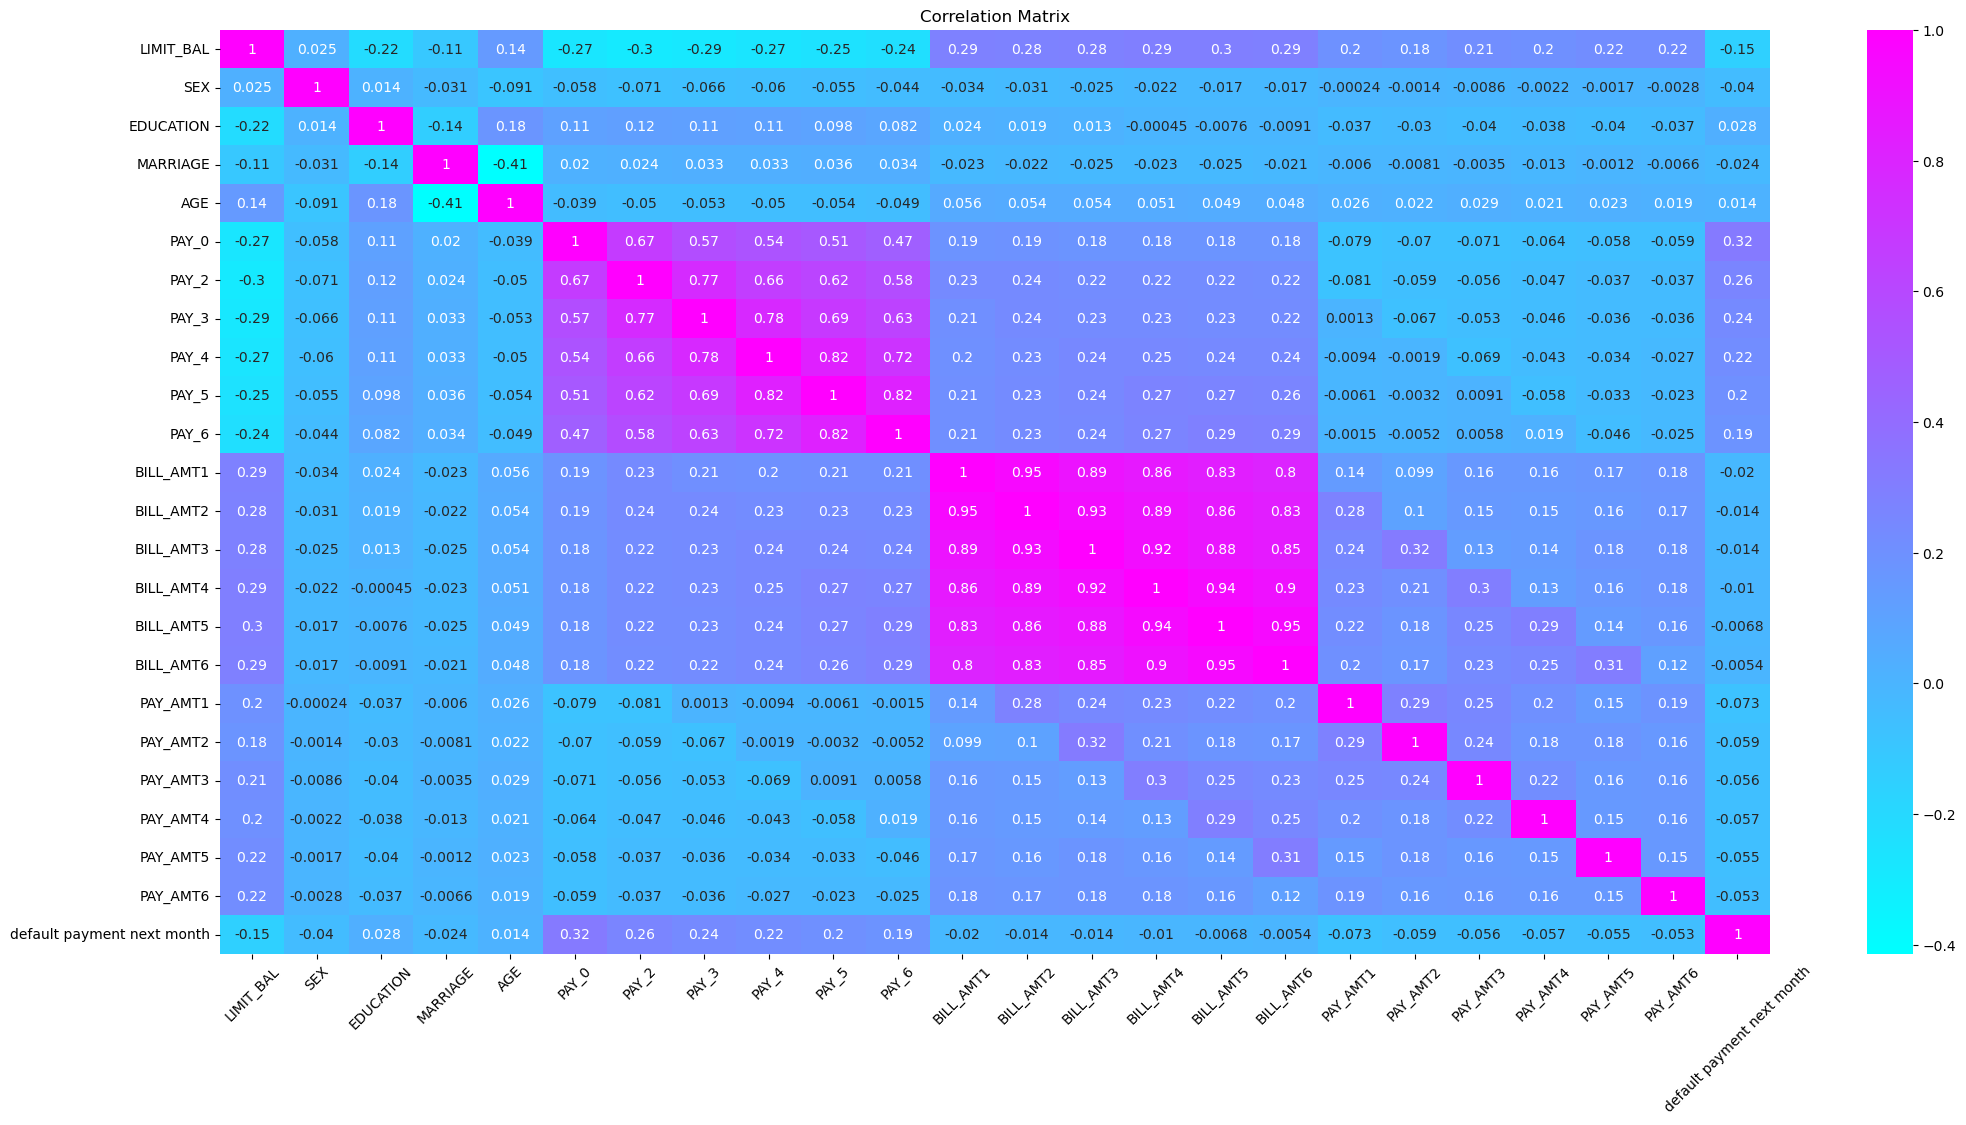

In [6]:
corr_mat = df.corr()
plt.figure(figsize = (25,12))
sns.heatmap(corr_mat, cmap='cool', annot= True)
plt.title('Correlation Matrix')
plt.xticks(rotation = 45)
plt.show();

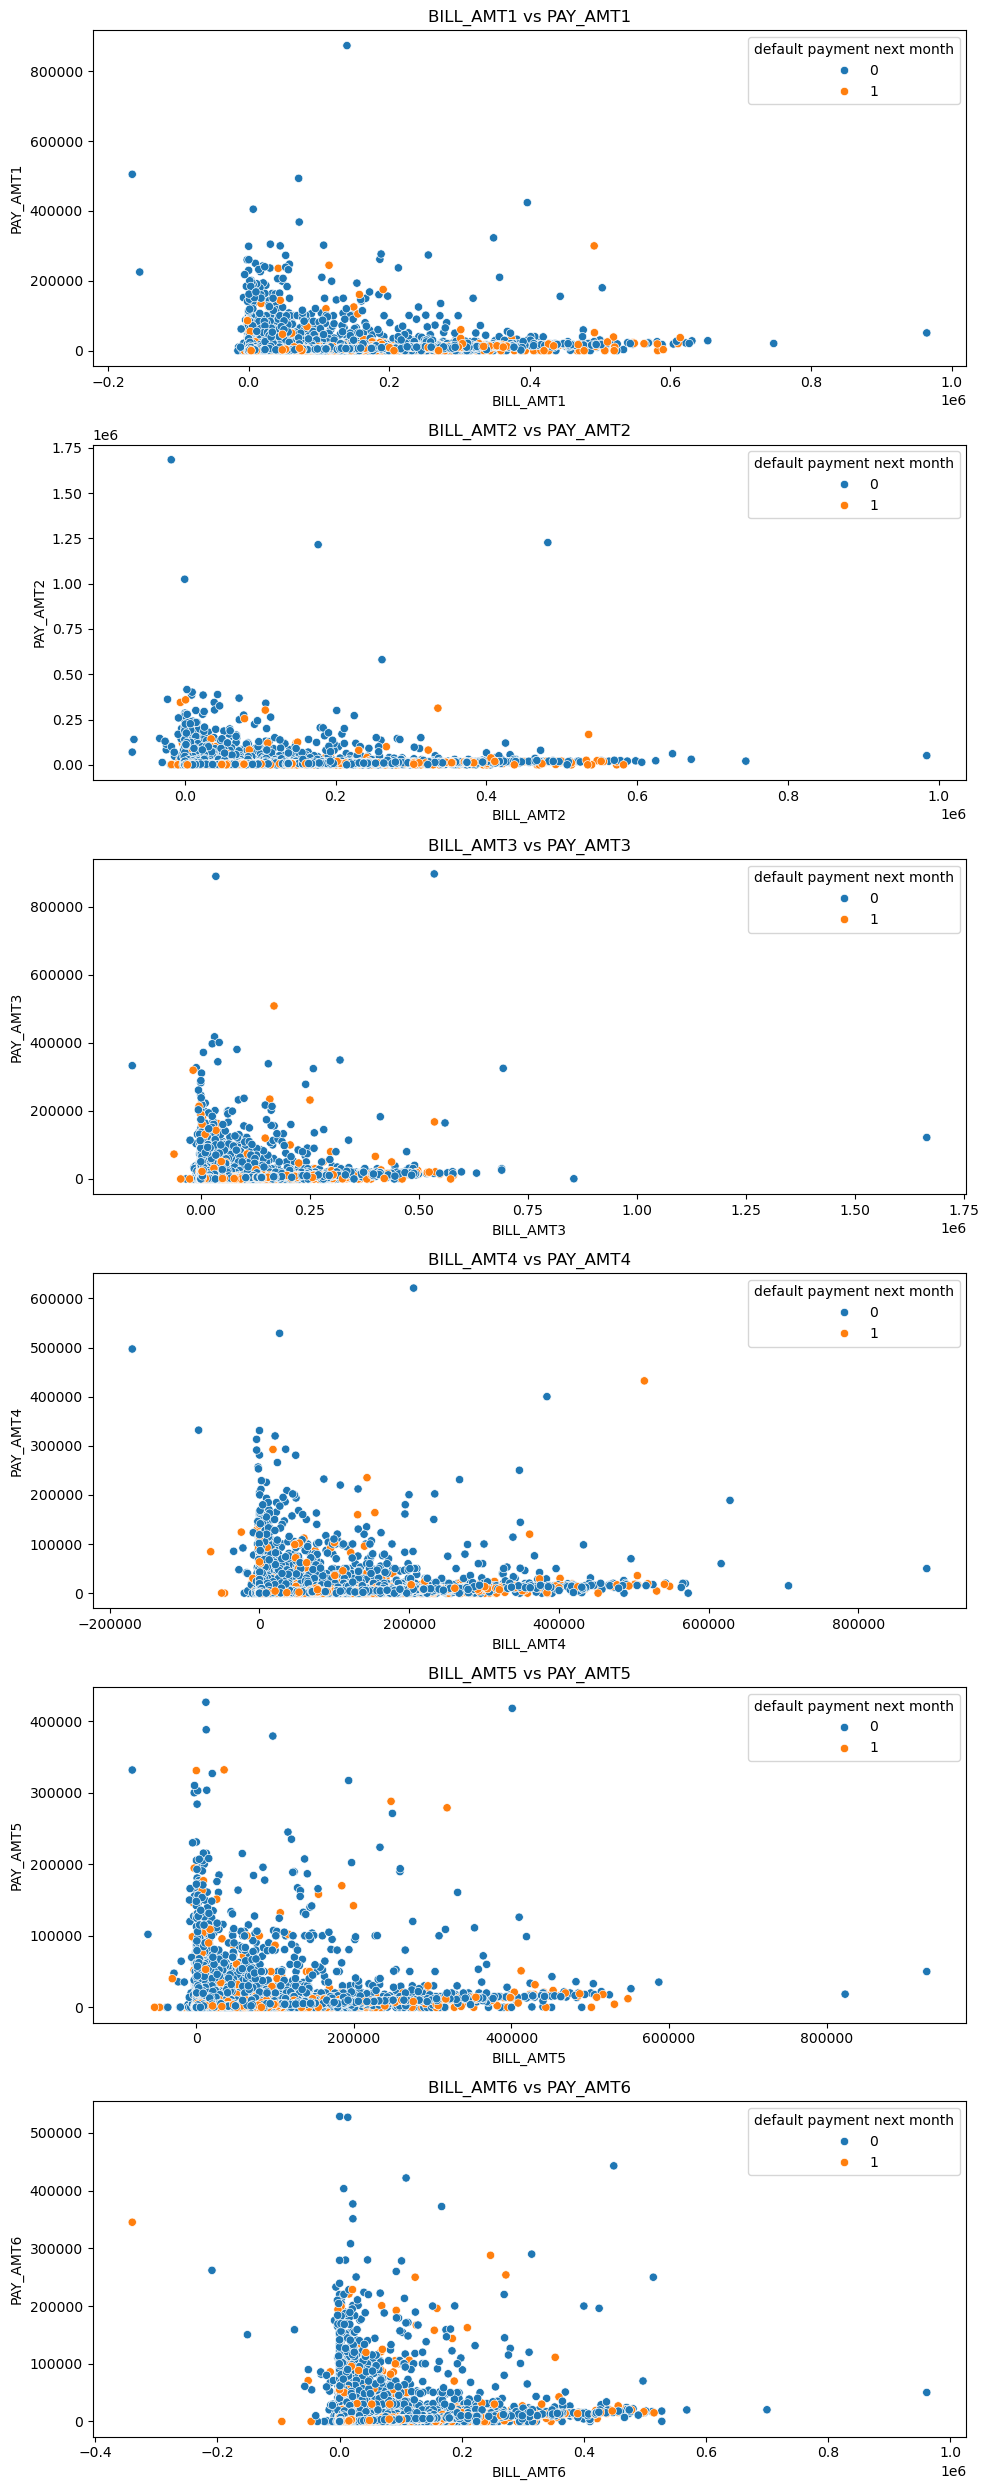

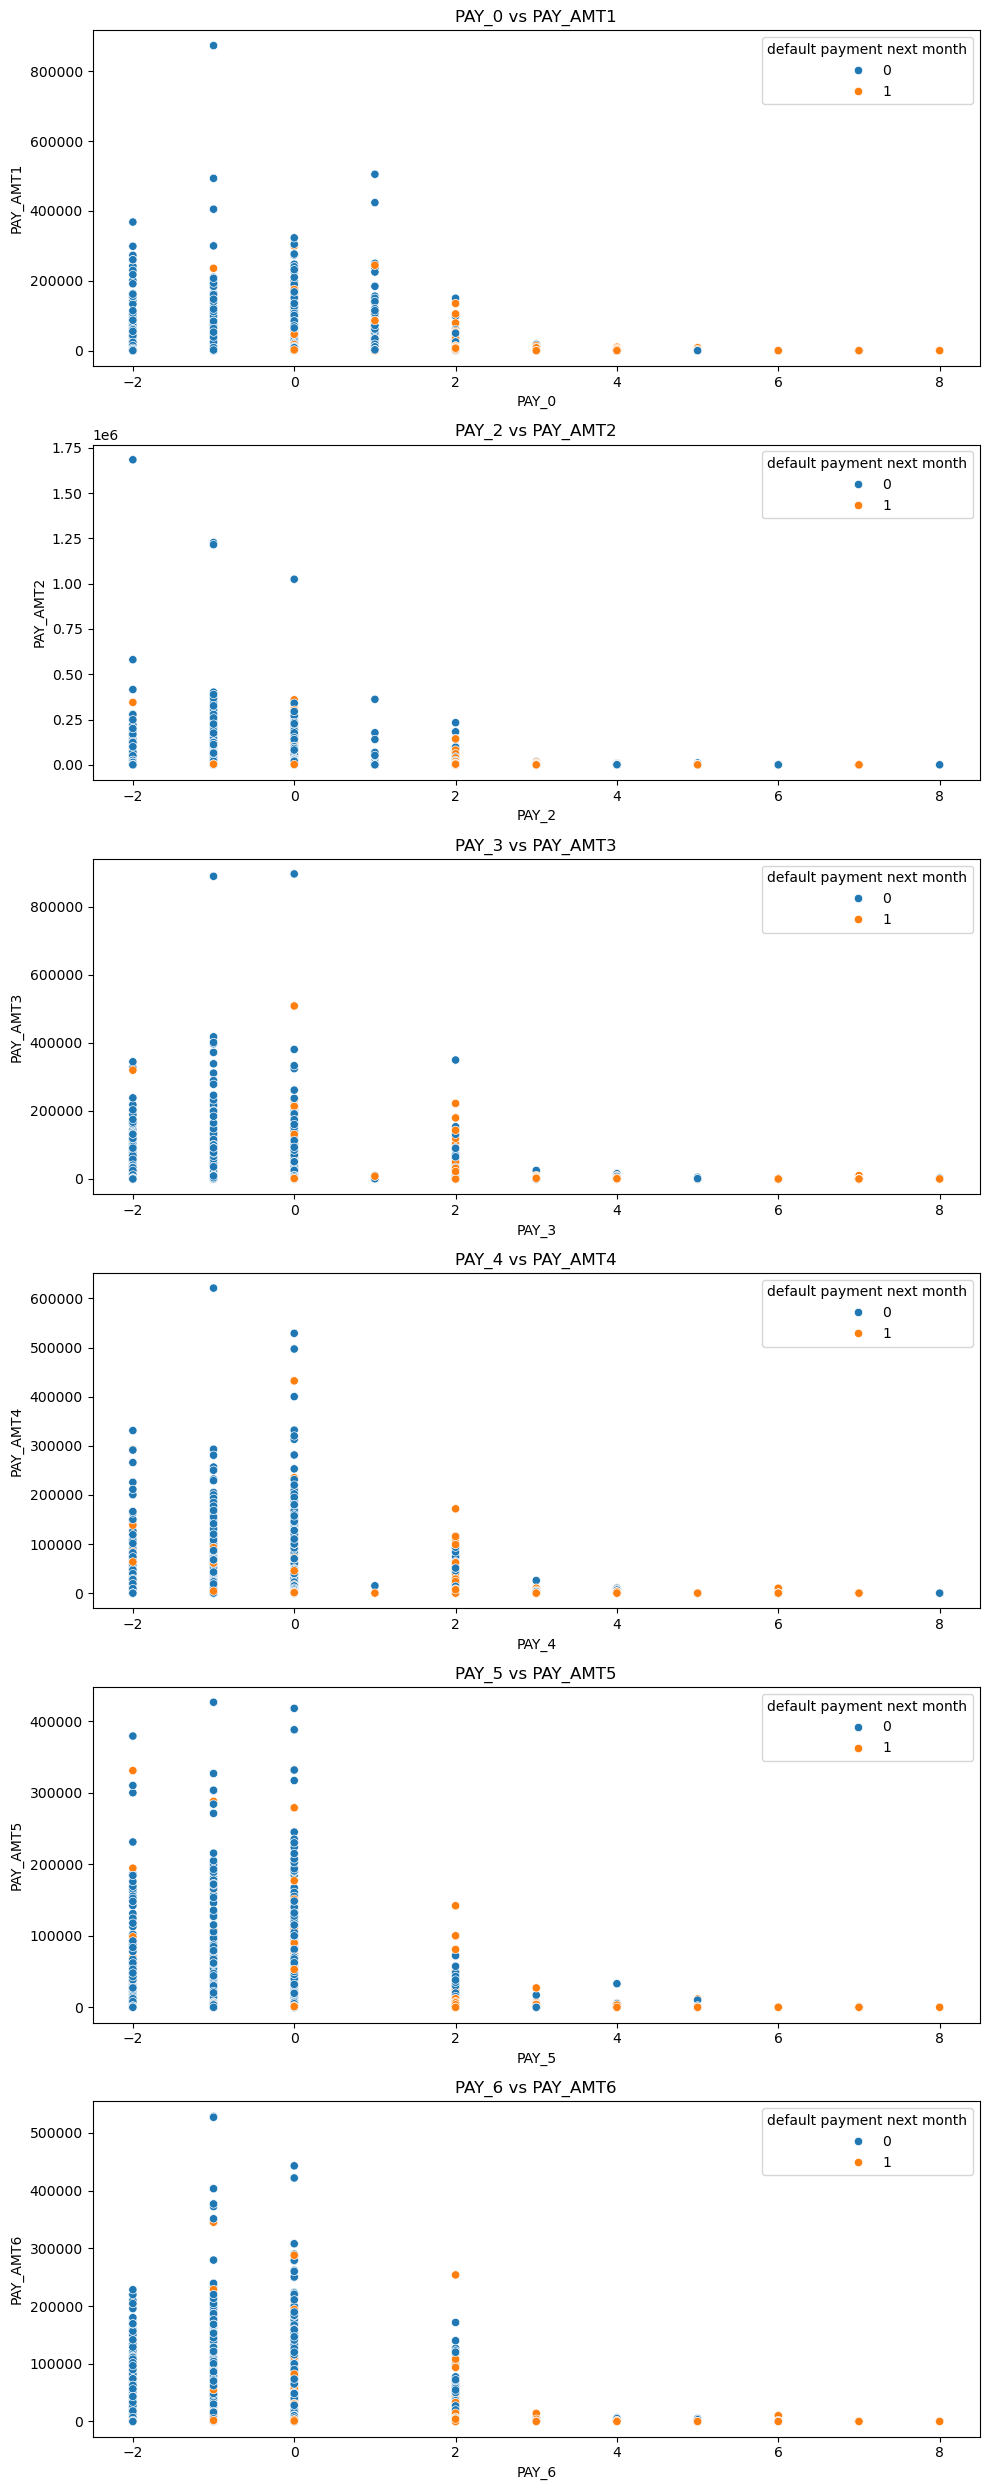

In [7]:
bill_amount = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
bill_payment = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
pay = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
default = []
plt.figure(figsize=(10, 25))

for i, (amt, bill_pay) in enumerate(zip(bill_amount, bill_payment)):
    plt.subplot(6, 1, i + 1)  
    sns.scatterplot(data=df, x=amt, y=bill_pay, hue='default payment next month')
    plt.title(f'{amt} vs {bill_pay}')
    plt.xlabel(amt)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();

plt.figure(figsize=(10, 25))

for i, (payment, bill_pay) in enumerate(zip(pay, bill_payment)):
    plt.subplot(6, 1, i + 1)  
    sns.scatterplot(data=df, x=payment, y=bill_pay, hue='default payment next month')
    plt.title(f'{payment} vs {bill_pay}')
    plt.xlabel(payment)
    plt.ylabel(bill_pay)

plt.tight_layout()
plt.show();



Clear patter on payments is noticeable  after the 2nd missed payment, the chances of defaulting the next increases 

Text(0.5, 1.0, 'Defaulted Balances by Education')

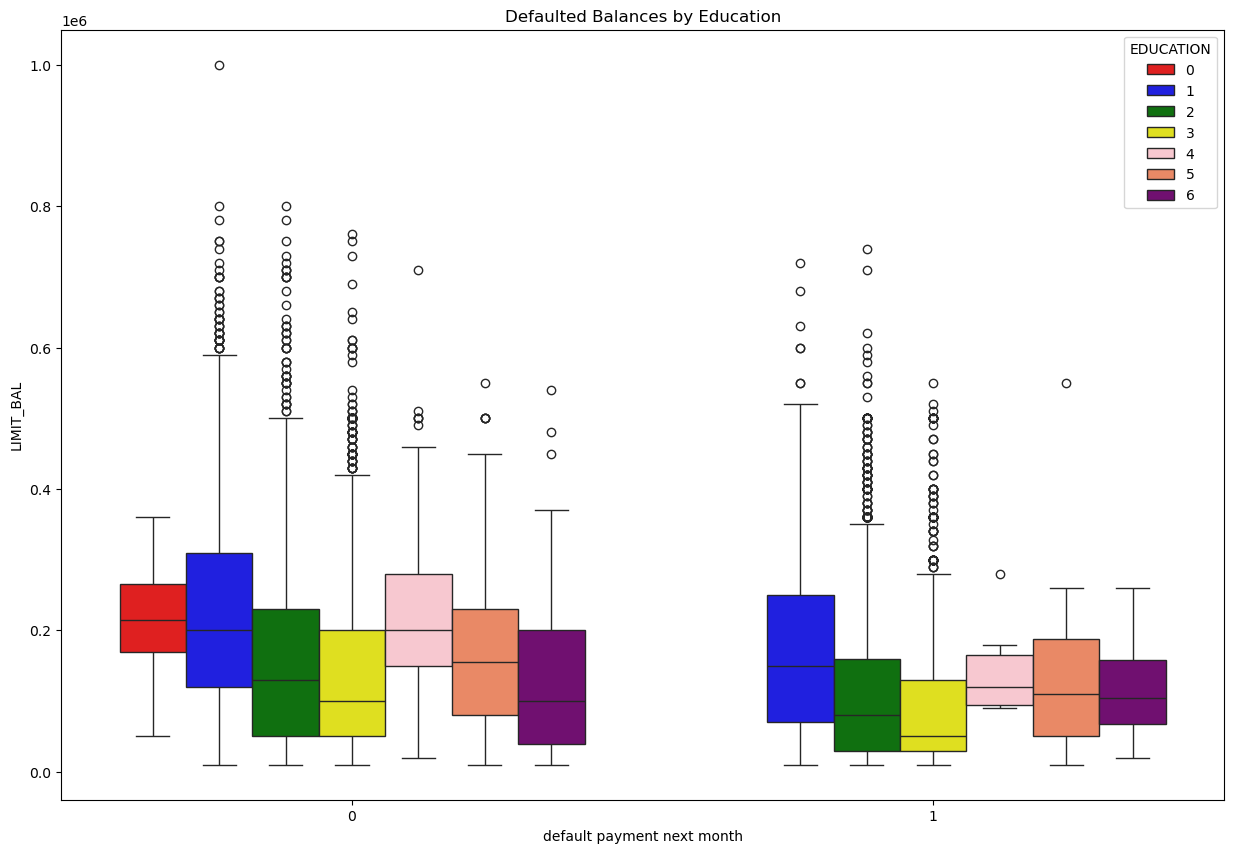

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = ['red', 'blue','green','yellow', 'pink', 'coral', 'purple'])
plt.title('Defaulted Balances by Education')

1 = Graduate school, 2 = University, 3 = High School, 4 = Other. We can probably combine 0, 5 and 6 into 4(other)

Text(0.5, 1.0, 'Defaulted Balances by Marital Status')

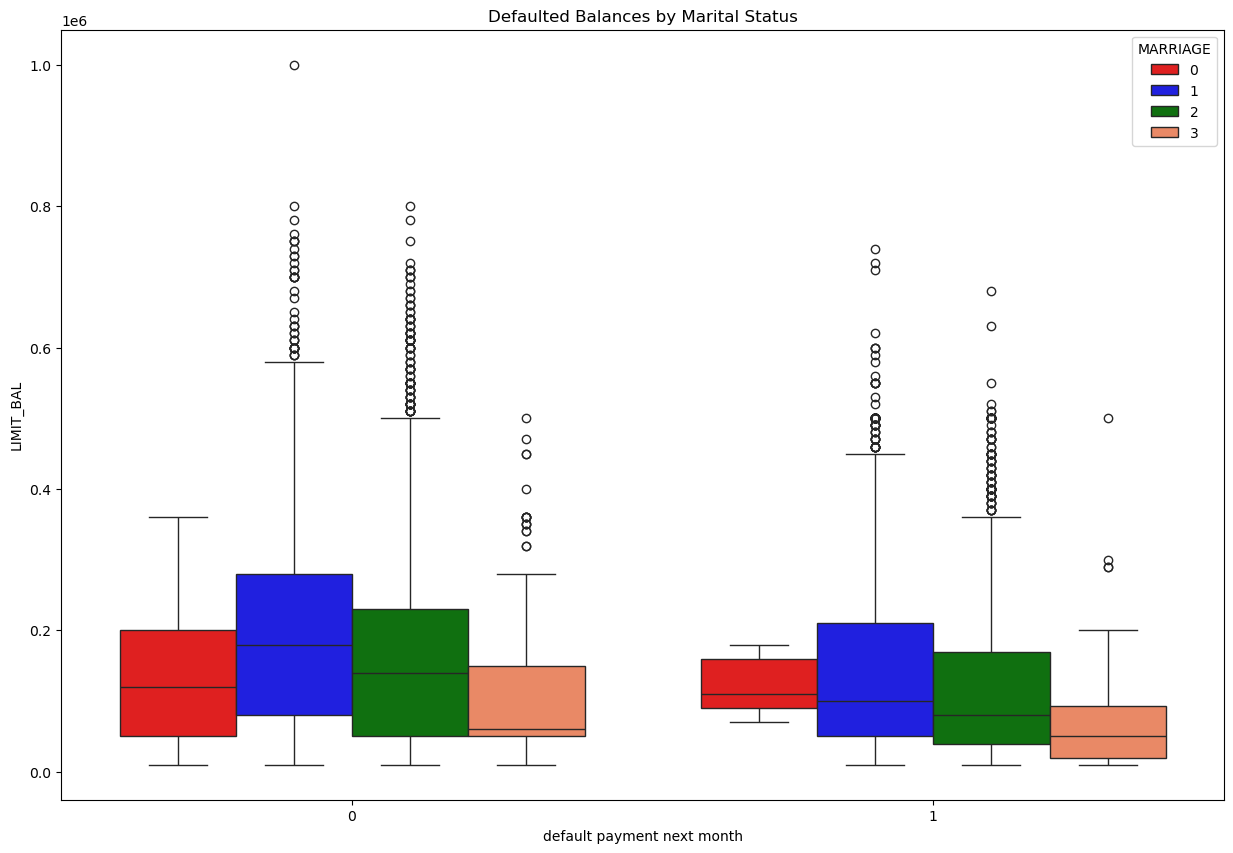

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(data= df, x = 'default payment next month', y = 'LIMIT_BAL', hue='MARRIAGE', palette = ['red', 'blue','green','coral'])
plt.title('Defaulted Balances by Marital Status')

X4: Marital status (1 = married; 2 = single; 3 = others).


Text(0.5, 1.0, 'Limit balance vs Age')

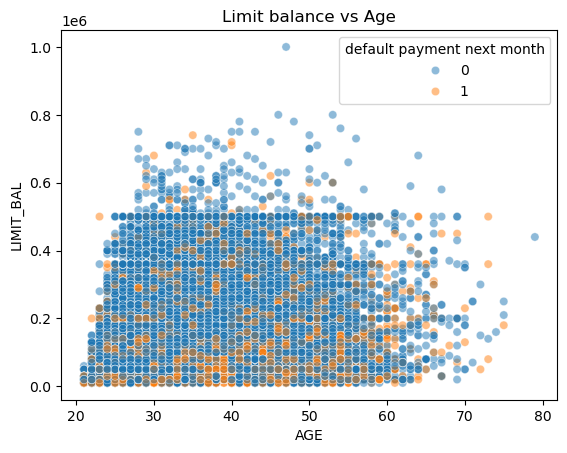

In [10]:
sns.scatterplot(data= df, x = 'AGE', y = 'LIMIT_BAL', hue= 'default payment next month', alpha = .5)
plt.title('Limit balance vs Age')

In [11]:
def outlier_treatment(df):
    indices_to_drop = set()
    for i in df.columns:
        
        unique_values = df[i].nunique()

        if unique_values <= 2:
            continue

        means = np.mean(df[i])
        standard_deviation = np.std(df[i])
        
        outliers = df[(df[i]  >= means + 3*standard_deviation) | ( df[i] <= means - 3*standard_deviation)].index
        indices_to_drop.update(outliers)
    
    new = df.drop(indices_to_drop, axis= 0)

    return new

In [12]:
new = outlier_treatment(df)

In [13]:
new

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


C:\Users\luisl\AppData\Local\Temp\ipykernel_372\4282682363.py:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.boxplot(data= new, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = ['red', 'blue','green','yellow', 'pink', 'coral', 'purple'])


Text(0.5, 1.0, 'Defaulted Balances by Education')

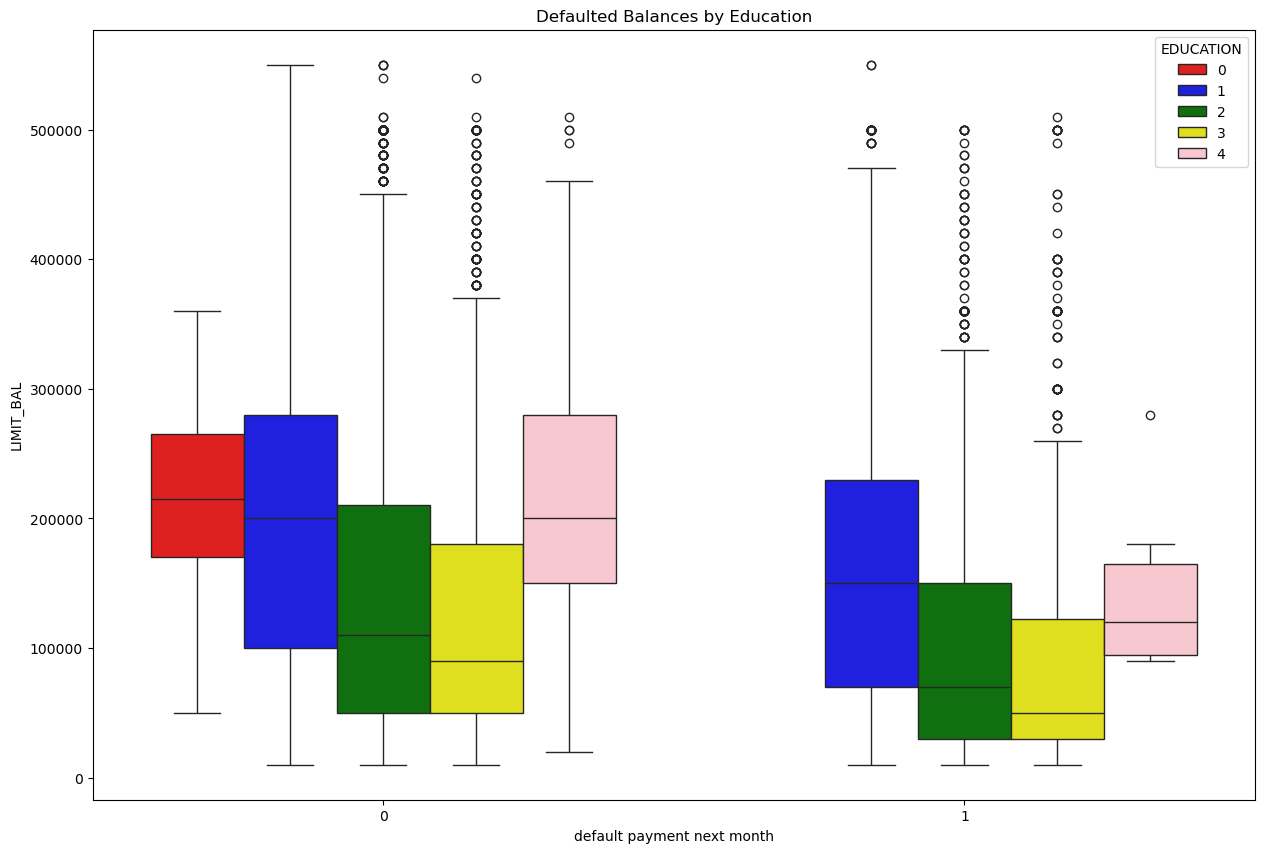

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data= new, x = 'default payment next month', y = 'LIMIT_BAL', hue='EDUCATION', palette = ['red', 'blue','green','yellow', 'pink', 'coral', 'purple'])
plt.title('Defaulted Balances by Education')

By using 3 standard deviations we confirm that 99% of our data points are captured, therefore even though there outliers present in our boxplot they fall within the majority distribution. 

## Machine Learning

In [15]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score,recall_score,precision_score, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

X = new.drop(columns='default payment next month', axis= 1)
y = new['default payment next month']



x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size= .25, random_state= 42 )


***Still Working on Function***

In [16]:
def metrics(ml_model,x_test,y_test, predictions):

    conf_mtrx = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtrx)
    disp.plot(cmap = 'Blues', include_values = True)
    plt.title('Confusion Matrix')
    plt.show();
    
    print(f'Accuracy: {round(accuracy_score(y_test,predictions),2)}')
    print(f'Precision: {round(precision_score(y_test, predictions),2)}')
    print(f'Recall : {round(recall_score(y_test, predictions),2)}')
    print(f'F1 Score: {round(f1_score(y_test, predictions),2)}')

def performance_plots(threshold, precs,rec, False_Positive_Rate, True_positive_rate,roc_auc):


    plt.plot(threshold, precs[:-1], "b--", label = 'Precision', linewidth =2)
    plt.plot(threshold, rec[:-1], "g-", label = "Recall", linewidth = 2)
    plt.xlabel('Threshold')
    plt.legend()
    plt.title('Precision Vs. Recall Curves')
    plt.show();

    plt.plot(False_Positive_Rate, True_positive_rate, linewidth = 2, color = 'darkorange' ,label=f'ROC curve (area = {round(roc_auc, 3)})')
    plt.plot([0,1], [0,1], 'k:', label = 'Random Classification Line')
    plt.fill_between(False_Positive_Rate, True_positive_rate, color='gray', alpha=0.3)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show();
    

I will probably try an d get some more information using K-MEans clustering approach and I will be applying a combination of XGBoost and Random Forest as my main algorithms